<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/wtss.png?raw=true" align="right" width="64"/>

# <span style="color:#336699">Web Time Series Service (WTSS) - Examples</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/wtss/wtss-examples.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rennan F. B. Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Matheus Zaglia<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: June 14, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives shows how to use the WTSS service to extract time series from <em>Brazil Data Cube</em>' service and how to perform a basic time series manipulation.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Vinhas, L.; Queiroz, G. R.; Ferreira, K. R.; Camara, G. <a href="http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004" target="_blank">Web Services for Big Earth Observation Data</a>. Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.
    </div>
</div>

# Python Client API
<hr style="border:1px solid #0077b9;">

To run the examples that will be presented in this Jupyter Notebook, you will need to have installed the Python library [wtss.py](https://github.com/brazil-data-cube/wtss.py). Additionally, for the time series visualization and interpolation examples, you will need to have installed the libraries [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://plotly.com/python/), [SciPy](https://www.scipy.org/) and [Folium] (http://python-visualization.github.io/folium/).

The installation of the mentioned libraries can be done with the service [Python Package Index (PyPI)](https://pypi.org/), through the command:

In [79]:
!pip install git+https://github.com/brazil-data-cube/wtss.py@b-0.7 numpy pandas matplotlib plotly scipy folium

  Cloning https://github.com/brazil-data-cube/wtss.py (to revision b-0.7) to /tmp/pip-req-build-xfmvaykx
  Running command git clone --filter=blob:none --quiet https://github.com/brazil-data-cube/wtss.py /tmp/pip-req-build-xfmvaykx
  Running command git checkout -b b-0.7 --track origin/b-0.7
  Switched to a new branch 'b-0.7'
  Branch 'b-0.7' set up to track remote branch 'b-0.7' from 'origin'.
  Resolved https://github.com/brazil-data-cube/wtss.py to commit 9d4922827da0978e80f57f01633eebf23fb37daa
  Preparing metadata (setup.py) ... done


In [80]:
!pip install --upgrade nbformat

> For more information on [WTSS client for Python](https://github.com/brazil-data-cube/wtss.py), see the introductory Jupyter Notebook about [Web Time Series Service (WTSS)](./wtss-introduction.ipynb) Introduction notebook.

# Set the service and Search for time series
<hr style="border:1px solid #0077b9;">

Import the WTSS client library:

In [81]:
from wtss import WTSS

Define the service to be used:

In [82]:
service = WTSS('https://data.inpe.br/bdc/wtss/v4/')

In [83]:
# service.coverages

Let's access the CBERS-4/AWFI coverage using the `CB4-16D-2` product:

In [84]:
s2_coverage = service['S2-16D-2']
s2_coverage

name,common name,description,datatype,valid range,scale,nodata
CLEAROB,ClearOb,,uint8,"{'min': 1.0, 'max': 255.0}",1.0,0.0
TOTALOB,TotalOb,,uint8,"{'min': 1.0, 'max': 255.0}",1.0,0.0
PROVENANCE,Provenance,,int16,"{'min': 1.0, 'max': 366.0}",1.0,-1.0
SCL,quality,,uint8,"{'min': 0.0, 'max': 11.0}",1.0,0.0
B01,coastal,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B02,blue,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B04,red,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B05,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B06,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B07,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0


Sentinel-2 spectral bands 04 and 08 correspond to the red and near-infrared (NIR) wavelength regions, respectivelly:

In [85]:
red_band = 'B04'
nir_band = 'B08'

Let's retrieve the time series for data product `S2-16D-2`, in the location of `latitude -16.817` and `longitude -52.079` from January 1st, 2019 to December 31st, 2019, using the `ts` method:

In [86]:
time_series = s2_coverage.ts(attributes=(red_band, nir_band),
                                 latitude=-9.41866, 
                                 longitude=-61.46103,
                                 start_date="2019-01-01",
                                 end_date="2019-12-31")

# Plot the Time Series
<hr style="border:1px solid #0077b9;">

**Static Visualization**

Once with the time series, one can visualize it using the `plot` method:

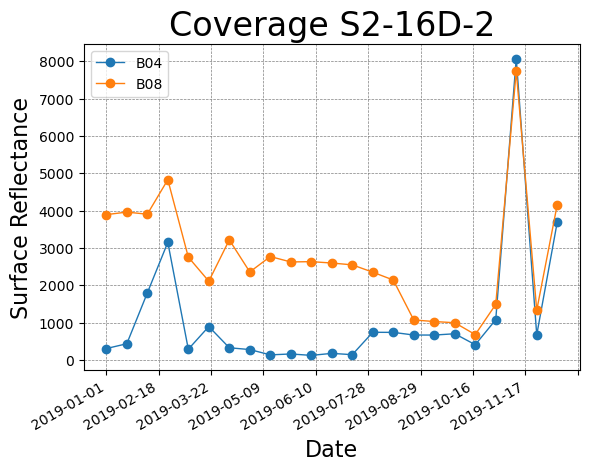

In [87]:
time_series.plot()

**Interactive Visualization**

Another way to visualize the time series is through interactive graphics, which allow dinamically explore the time series patterns.

To do that, we will use the [Plotly](https://plotly.com/python/) and [Pandas](https://pandas.pydata.org/) libraries, which can be imported as:

In [88]:
import pandas as pd
import plotly.express as px

Let's create a `pandas.DataFrame` containing the temporal attributes for `B04` and `B08`:

In [89]:
s2_df = pd.DataFrame({ 'B04': time_series.B04, 'B08': time_series.B08 }, 
                        index = pd.to_datetime(time_series.timeline))

s2_df

,B04,B08
2019-01-01,312,3897
2019-01-17,441,3964
2019-02-02,1800,3908
2019-02-18,3154,4831
2019-03-06,294,2759
2019-03-22,901,2114
2019-04-07,333,3221
2019-04-23,285,2362
2019-05-09,143,2774
2019-05-25,167,2630


Now we can use the `pandas.DataFrame` to create an interactive graphic:

In [90]:
fig = px.line(s2_df, x=s2_df.index, y=['B04', 'B08'], title='Sentinel-2/MSI (B04 and B08)', labels={
    'index': 'Date',
    'value': 'Spectral Reflectance (scaled)'
})

fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Removing clouds from Time Series
<hr style="border:1px solid #0077b9;">

When we work with satellite image time series there are external influences that can bring noise to the values of the series, distorting them. A common example of noise is the observation of clouds, which change the spectral behavior of targets, making them often unidentifiable. In Figure 1, images from the Sentinel-2/MSI sensor satellite of the `20LKP` tile are shown, where it is possible to observe that, for the same region, in close dates, the presence of clouds.

<div align="center">
    <figcaption><strong>Figure 1</strong> - Imagens Sentinel-2/MSI (Tile 20LKP) com influência de Nuvem</figcaption>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/sentinel-2-clouds.png?raw=true" align="center" width="620rem"/>
    <br>
    <strong>Fonte</strong>: Simoes <i>et al.</i> (2021)
</div>

In the context of satellite image time series, a possible approach for the treatment of this type of noise is to replace the time series points that have cloud influence by interpolated values.

For this, it is necessary to have data available to identify the influence of the cloud at each point in the time series. When considering the BDC data products, this approach is possible since the data cubes are produced with masks that identify, *pixel* to *pixel*, the cloud influence on the images.

Therefore, in this second example, we will use the cloud mask provided in the BDC data products, together with the linear interpolation technique, to remove the cloud influence from the time series.

To start, first lets look at the `S2-16D-2` *Coverage* metadata:

In [91]:
s2_coverage

name,common name,description,datatype,valid range,scale,nodata
CLEAROB,ClearOb,,uint8,"{'min': 1.0, 'max': 255.0}",1.0,0.0
TOTALOB,TotalOb,,uint8,"{'min': 1.0, 'max': 255.0}",1.0,0.0
PROVENANCE,Provenance,,int16,"{'min': 1.0, 'max': 366.0}",1.0,-1.0
SCL,quality,,uint8,"{'min': 0.0, 'max': 11.0}",1.0,0.0
B01,coastal,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B02,blue,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B04,red,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B05,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B06,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B07,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0


In this metadata, we can see the attribute `SCL`, which stands for "Scene Classification Layer" and uses the following values:

- `0`: no data;
- `1`: saturated or defective;
- `2`: dark area pixels;
- `3`: cloud shadow;
- `4`: vegetation;
- `5`: not vegetated;
- `6`: water;
- `7`: unclassified;
- `8`: cloud medium probability;
- `9`: cloud high probability;
- `10`: thin cirrus;
- `11`: snow;

Let's retrieve the time series, for the location `latitude -12.0`, `longitude -53.989` from `January 1, 2019` to `December 31, 2019`.

In [92]:
s2_timeseries_scl = s2_coverage.ts(

    attributes = ('SCL'),

    latitude = -12.0,
    longitude = -53.989,

    start_date = "2019-01-01",
    end_date = "2019-12-31"
)

s2_timeseries_scl

Time Series S2-16D-2
 
 
 
 
 SCL: [4, 10, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 9, 4, 4]
 
 
 
 
 timeline 
 
 
 
 2019-01-01 2019-01-17 2019-02-02 2019-02-18 2019-03-06 2019-03-22 2019-04-07 2019-04-23 2019-05-09 2019-05-25 2019-06-10 2019-06-26 2019-07-12 2019-07-28 2019-08-13 2019-08-29 2019-09-14 2019-09-30 2019-10-16 2019-11-01 2019-11-17 2019-12-03 2019-12-19

Let's preview the returned values. To make the visualization simpler, let's remove the values that are duplicated:

In [93]:
set(s2_timeseries_scl.values('SCL'))

{4, 8, 9, 10}

Note that, among the values returned, there are *pixels* that have values `8`, `9` or `10`. This indicates that certain values have cloud and may be removed.

To present the example of interpolation, let's make use of the `NDVI` attribute. So, first let's do a new time series extraction, considering now both attributes, `NDVI` and `SCL`:

In [94]:
s2_timeseries = s2_coverage.ts(

    attributes = ('NDVI', 'SCL'),

    latitude = -12.0,
    longitude = -53.989,

    start_date = "2017-01-01",
    end_date = "2019-12-31"

)

Let's perform this operation step by step. So, first let's retrieve the timeline from the extracted time series and then transform them into `datetime` type objects. This can be done with the command below:

<div style="text-align: center; margin-left: 25%; margin-right: 25%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Tip:</b> The timeline to <em>datetime</em> conversion operation is necessary since, although the <em>cb4_timeseries.timeline</em> attribute stores a list of dates, in Python, the values in this list are just text and are not interpreted by the language as valid dates. This can make it difficult to manipulate this data, especially when considering aggregations and temporal selections of the data using the <em>Pandas</em> library.
</div>

In [95]:
ndvi_timeline = pd.to_datetime(s2_timeseries.timeline)
ndvi_timeline

DatetimeIndex(['2017-01-01', '2017-01-17', '2017-02-02', '2017-02-18',
               '2017-03-06', '2017-03-22', '2017-04-07', '2017-04-23',
               '2017-05-09', '2017-05-25', '2017-06-10', '2017-06-26',
               '2017-07-12', '2017-07-28', '2017-08-13', '2017-08-29',
               '2017-09-14', '2017-09-30', '2017-10-16', '2017-11-01',
               '2017-11-17', '2017-12-03', '2017-12-19', '2018-01-01',
               '2018-01-17', '2018-02-02', '2018-02-18', '2018-03-06',
               '2018-03-22', '2018-04-07', '2018-04-23', '2018-05-09',
               '2018-05-25', '2018-06-10', '2018-06-26', '2018-07-12',
               '2018-07-28', '2018-08-13', '2018-08-29', '2018-09-14',
               '2018-09-30', '2018-10-16', '2018-11-01', '2018-11-17',
               '2018-12-03', '2018-12-19', '2019-01-01', '2019-01-17',
               '2019-02-02', '2019-02-18', '2019-03-06', '2019-03-22',
               '2019-04-07', '2019-04-23', '2019-05-09', '2019-05-25',
      

Now, let's store the values of the `NDVI` and `SCL` attributes of the extracted time series in a `numpy.array`. This will be done to facilitate the manipulation of this data.

In [96]:
import numpy as np

ndvi_data = np.array(s2_timeseries.NDVI)
ndvi_data

scl_data = np.array(s2_timeseries.SCL)
scl_data

array([ 4,  4,  0,  0,  7,  0,  0,  4,  0,  0,  0,  0,  4,  0,  4,  4,  7,
       10,  4,  8,  9,  9,  4,  7,  4,  9,  4,  7,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  9,  4,  4,  4, 10,  4, 10,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  8,  4,  4,  9,  4,
        4])

Now, we need to adopt some strategy to make the values that have cloud influence be marked as `nan` in the dataset.

As the values of both attributes are stored in a `numpy.array`, we can then use the features of [numpy](https://numpy.org/), to manipulate this data.

Considering this, we are going to adopt a strategy in which we will apply a transformation to the `SCL` data, so that every position in the array that represents cloud influence will be converted to `nan`, while the other values will be converted to `1`. With this approach, we will be able to multiply the array resulting from the transformation, with the data of other attributes, which will make the positions with cloud influence become `nan` as well.

To be clear, let's perform this operation. First, with the code below, let's convert the values of `SCL`

In [97]:
scl_values_to_not_mask = [4, 5, 6]

In [98]:
scl_data = np.where(np.isin(scl_data, scl_values_to_not_mask), 1, np.nan)
scl_data

array([ 1.,  1., nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,  1.,
       nan,  1.,  1., nan, nan,  1., nan, nan, nan,  1., nan,  1., nan,
        1., nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., nan,  1.,  1.,  1., nan,  1., nan,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,
        1., nan,  1.,  1.])

Note that now, there are some `nan` values in the `SCL` array, while all others are equal to `1`. By multiplying this mask array, with the `NDVI` array, we have the following effect:

In [99]:
ndvi_data * scl_data

array([7957., 6637.,   nan,   nan,   nan,   nan,   nan, 8613.,   nan,
         nan,   nan,   nan, 8651.,   nan, 8268., 7976.,   nan,   nan,
       7973.,   nan,   nan,   nan, 7588.,   nan, 8064.,   nan, 8017.,
         nan,   nan, 8322., 8494., 8240., 8308., 8369., 8310., 8423.,
       8422., 8588., 8451., 5865., 8138., 8238., 7986.,   nan, 8693.,
       8555., 8464.,   nan, 7108.,   nan, 8290., 7880., 8434., 8504.,
       8310., 8433., 8360., 8274., 8572., 8672., 8548., 8144., 8027.,
         nan, 7957., 8228.,   nan, 6223., 7615.])

Note that among the values of `NDVI` in the time series, some values were transformed into `nan`. Now, we can perform the interpolation of our time series.

For that, we're going to put this data inside a `pandas.DataFrame`. As we only have one data attribute, `NDVI`, let's multiply it with the mask array and store it in a column of the `DataFrame`, named `data`. The index (Name of the lines of the `DataFrame`), will be each of the dates of the timeline (Converted to datetime in the previous step).

The command below creates the `DataFrame` with the specified characteristics:

In [100]:
ndvi_masked_data = pd.DataFrame({ 'data': ndvi_data * scl_data }, index = pd.to_datetime(ndvi_timeline))
ndvi_masked_data

,data
2017-01-01,7957.0
2017-01-17,6637.0
2017-02-02,NaN
2017-02-18,NaN
2017-03-06,NaN
...,...
2019-10-16,7957.0
2019-11-01,8228.0
2019-11-17,NaN
2019-12-03,6223.0


If we look in the `DataFrame` for the lines that have `na` values, we should find some of them:

In [101]:
ndvi_masked_data[ndvi_masked_data['data'].isna()]

,data
2017-02-02,NaN
2017-02-18,NaN
2017-03-06,NaN
2017-03-22,NaN
2017-04-07,NaN
2017-05-09,NaN
2017-05-25,NaN
2017-06-10,NaN
2017-06-26,NaN
2017-07-28,NaN


Now, using the `interpolate` method, available in `pandas.DataFrame`, let's interpolate our data:

In [102]:
ndvi_masked_data_interpolated = ndvi_masked_data.interpolate()
ndvi_masked_data_interpolated

,data
2017-01-01,7957.000000
2017-01-17,6637.000000
2017-02-02,6966.333333
2017-02-18,7295.666667
2017-03-06,7625.000000
...,...
2019-10-16,7957.000000
2019-11-01,8228.000000
2019-11-17,7225.500000
2019-12-03,6223.000000


The interpolation result was saved in the `ndvi_masked_data_interpolated` variable. When querying this variable for the existence of `nan` values, no value should be returned:

In [103]:
ndvi_masked_data_interpolated[ndvi_masked_data_interpolated['data'].isna()]

,data


Done! We interpolate our data. To visualize the result of this operation and the difference caused by this change in the series, below, let's visualize the original series and the interpolated series.

As the [Matplotlib](https://matplotlib.org/) library will be used in this view, it must be imported. This can be done with the code below:

In [104]:
import matplotlib.pyplot as plt

We can then compare time series

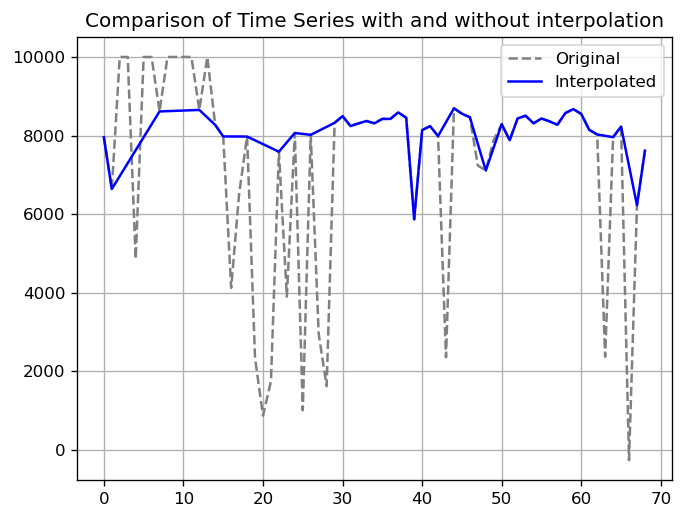

In [105]:
plt.figure(dpi = 120)

plt.plot(ndvi_data, color='gray', linestyle='dashed', label = 'Original')
plt.plot(ndvi_masked_data_interpolated['data'].values, color='blue', label = 'Interpolated')

plt.title('Comparison of Time Series with and without interpolation')
plt.legend()
plt.grid(True)
plt.show()

## Time series smoothing
<hr style="border:1px solid #0077b9;">

In addition to cloud noise, there are many other factors that can influence the time series values ​​of Remote Sensing images. For these cases, a solution can be to apply filters to smooth the time series.

There are several smoothing algorithms that can be used, in this example the smoothing of the time series will be presented using the `Savitzky Golay` filter. The time series used in this example will be the same interpolated in the previous step.

For the example, the `Savitzky Golay` filter implemented in the library [SciPy](https://www.scipy.org/) will be used. Importing the filter function can be done as follows:

In [106]:
from scipy.signal import savgol_filter

With the filter function imported, let's apply it to the interpolated data:

In [107]:
median_smoothed = savgol_filter(ndvi_masked_data_interpolated['data'], window_length = 9, polyorder = 2)

<div style="text-align: center; margin-left: 25%; margin-right: 25%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> The <em>Savitz Golay</em> algorithm uses <b>window_length</b> and the <b>polynomial order</b> used as parameters. You can change these values ​​to see the impacts on the smoothing of the series. Additionally, if you are more interested in time series smoothing, it is recommended to read <a href="https://e-sensing.github.io/sitsbook/working-with-time-series.html#filtering -techniques-for-time-series" target="_blank"> "Section 3.5 - Filtering techniques for time series" of the <em>sits</em></a> user manual
</div>

To compare the results, in the same way as for the interpolation, let's create a plot that allows us to visualize the changes:

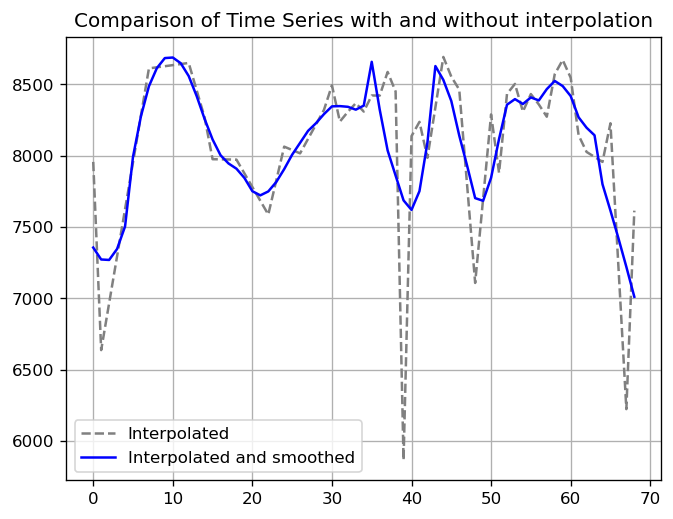

In [108]:
plt.figure(dpi = 120)

plt.plot(ndvi_masked_data_interpolated['data'].values, color='gray', linestyle='dashed', label = 'Interpolated')
plt.plot(median_smoothed, color='blue', label = 'Interpolated and smoothed')

plt.title('Comparison of Time Series with and without interpolation')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Median Time Series
<hr style="border:1px solid #0077b9;">

So far, all examples have made use of time series varying only in the number of attributes. Thus, in this example, a set of time series will be used in order to extract a median time series.

The first thing to do then, is to determine the points that will be used. In this case, for the extraction of time series, we will generate points in an agricultural region in the state of Mato Grosso. These points will be generated considering the following criteria:

- Longitude: Fixed at the value `-53,989`;
- Latitude: Variable from `-16.9000` to `-16.9075` at a rate of `-0.0015`.

This will generate five points. These will be used to extract time series from the previously selected *Coverage*, considering data from `January 1, 2017` to `December 31, 2019`. Only the NDVI vegetation index attribute will be used.

Let's start with generating the points, which can be done with the code below:

In [109]:
longitude = -53.989  # Fixado
locations = []  # variável

for latitude in np.arange(-16.9000,-16.9075,-0.0015):
    locations.append(( latitude, longitude ))

At the end of the operation, we have a set of locations stored in the `locations` variable:

In [110]:
locations

[(-16.9, -53.989),
 (-16.9015, -53.989),
 (-16.903, -53.989),
 (-16.9045, -53.989),
 (-16.906, -53.989),
 (-16.9075, -53.989)]

To more clearly present the region from which the time series will be collected, let's place the generated points on an interactive map:

In [111]:
import folium

Creating the map:

In [112]:
m = folium.Map(
    location = [-16.9, -53.989],
    zoom_start = 15,
)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

Finally, let's add the points to the map and then do the visualization:

In [113]:
for location in locations:
    folium.Circle(
        fill=True,  # Preenchimento
        color = 'orange',  # Cor
        location=location,  # Localização
    ).add_to(m)

m

Now, let's extract the time series from each of these points.

In [114]:
agriculture_time_series = []

for location in locations:
    latitude, longitude = location

    time_series = s2_coverage.ts(attributes=('NDVI'),
                                     latitude=float(latitude), longitude=float(longitude),
                                     start_date="2017-01-01", end_date="2019-12-31")

    agriculture_time_series.append(time_series.values('NDVI'))

As we had 6 points, we must have saved 6 time series. Let's check it out by looking at the number of elements in the `agriculture_time_series` list. This can be done with the `len` function, as shown in the command below:

In [115]:
len(agriculture_time_series)

6

Now, using the `median` function from the [NumPy](https://numpy.org/) library, let's calculate the median value for each point in the time series:

<div style="text-align: center; margin-left: 25%; margin-right: 25%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Tip:</b> The operation <em>median</em> will use the parameter <em>axis=0</em> so that the median is calculated considering a set of points in each instant of time, so that the median of each instant of time is the median value of 5 values ​​(One of each point).
</div>

In [116]:
median = np.median(agriculture_time_series, axis = 0)
median

array([ 2902. ,  2823. ,  3195.5,  6988. ,  3622. ,   539. , 10000. ,
        9228.5,  8383. ,  8619.5,  6587.5,  4660.5,  3873. ,  3467.5,
        2610.5,  2864. ,  3083.5,  3135. ,  2670. ,  3471. ,  5076.5,
        8062. ,  2300.5,   -19. ,  8551. ,  5928.5,  1496. ,  6810.5,
        7017.5,  9299. ,  9219. ,  9093.5,  8460.5,  6710.5,  5499. ,
        3157. ,  2428. ,  2250.5,  2197.5,   628.5,  2222. ,  3729. ,
        8698. ,   737. ,  5708.5,  3662. ,  2254. ,  2933.5,  5424. ,
        6443. ,  7622.5,  9129. ,  9230.5,  9203. ,  9027. ,  8027. ,
        6065. ,  3609. ,  3433. ,  3383.5,  3246. ,  2688.5,  2822. ,
        3259. ,  4637. ,  2116.5,  9094. ,  9219.5,  9304. ])

Now, let's visualize each of the original time series and compare them to the median:

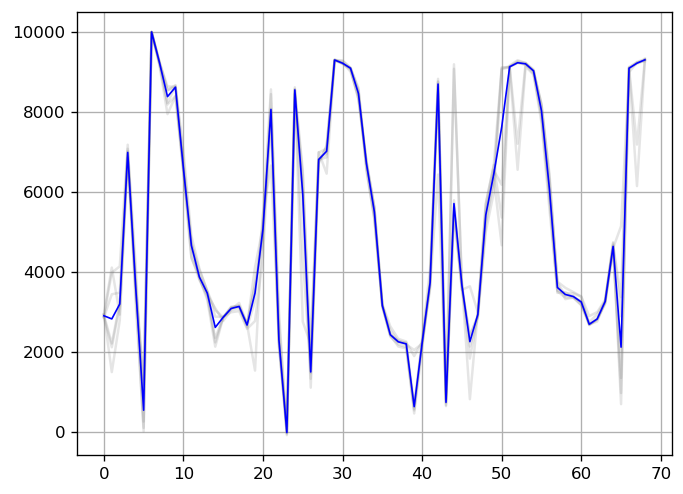

In [117]:
plt.figure(dpi = 120)

#
# Criando plot das séries temporais originais
#
for i in range(len(agriculture_time_series)):
    plt.plot(agriculture_time_series[i], color = 'grey', alpha = .2)

plt.plot(median, color='blue', linewidth = 1)

plt.grid(True)
plt.show()

# References
<hr style="border:1px solid #0077b9;">

- [Python Client Library for Web Time Series Service - User Guide](https://wtss.readthedocs.io/en/latest/index.html)


- [Python Client Library for Web Time Series Service - GitHub Repository](https://github.com/brazil-data-cube/wtss.py)


- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)


- VINHAS, L.; QUEIROZ, G. R.; FERREIRA, K. R.; CÂMARA, G. [Web Services for Big Earth Observation Data](http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004). Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.

- Simoes, R., Camara, G., Souza, F., Santos, L., Andrade, P. R., Peletier, C., Carvalho, A., Ferreira, K., Queiroz, G., & Maus, V. (2021). sits: Data Analysis and Machine Learning on Earth Observation Data Cubes with Satellite Image Time Series. Online.

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [Introduction to the Web Time Series Service (WTSS)](./wtss-introduction.ipynb)